`point-eo` can be also used as a module. This notebook guides you through prediction for a datacube loaded with xarray. It assumes you have created a model first, using the `analysis` script.

In [1]:
import point_eo.scripts.predict as predict
import xarray as xr
import rioxarray
import geopandas as gpd

In [2]:
input_raster = r"../data/s2_2018_lataseno.tif"
Fx = rioxarray.open_rasterio(
    input_raster,
    chunks={"band": -1, "x": 2**10, "y": 2**10},
    lock=False,
    parallel=True,
)
Fx

<xarray.DataArray (band: 9, y: 1812, x: 2222)>
dask.array<open_rasterio-64765af9eb46f866c8e12eb32811e55f<this-array>, shape=(9, 1812, 2222), dtype=uint16, chunksize=(9, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int32 1 2 3 4 5 6 7 8 9
  * x            (x) float64 2.975e+05 2.975e+05 ... 3.197e+05 3.197e+05
  * y            (y) float64 7.62e+06 7.62e+06 7.62e+06 ... 7.602e+06 7.602e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:             Area
    LAYER_TYPE:                athematic
    OVERVIEWS_ALGORITHM:       ErdasBino3
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        1443
    STATISTICS_MEAN:           257.42705179609
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         92.950704352944
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0
    long_name:                 ('Layer_1', 'Layer_2', 'Layer_3', 'Layer_4', '...

In [3]:
# Create calculation grid
grid_cells = predict.create_cell_grid(Fx, 3000)
grid_cells

[<POLYGON ((294475 7602135, 294475 7605135, 297475 7605135, 297475 7602135, 2...>,
 <POLYGON ((294475 7605135, 294475 7608135, 297475 7608135, 297475 7605135, 2...>,
 <POLYGON ((294475 7608135, 294475 7611135, 297475 7611135, 297475 7608135, 2...>,
 <POLYGON ((294475 7611135, 294475 7614135, 297475 7614135, 297475 7611135, 2...>,
 <POLYGON ((294475 7614135, 294475 7617135, 297475 7617135, 297475 7614135, 2...>,
 <POLYGON ((294475 7617135, 294475 7620135, 297475 7620135, 297475 7617135, 2...>,
 <POLYGON ((294475 7620135, 294475 7623135, 297475 7623135, 297475 7620135, 2...>,
 <POLYGON ((294475 7623135, 294475 7626135, 297475 7626135, 297475 7623135, 2...>,
 <POLYGON ((297475 7602135, 297475 7605135, 300475 7605135, 300475 7602135, 2...>,
 <POLYGON ((297475 7605135, 297475 7608135, 300475 7608135, 300475 7605135, 2...>,
 <POLYGON ((297475 7608135, 297475 7611135, 300475 7611135, 300475 7608135, 2...>,
 <POLYGON ((297475 7611135, 297475 7614135, 300475 7614135, 300475 7611135, 2...>,
 <PO

In [4]:
import pickle
with open(r"../data/demo_model.pkl", "rb") as f:
    model = pickle.load(f)
model

RandomForestClassifier(n_jobs=-1)

In [5]:
predict.calculate(model = model,
                  Fx = Fx,
                  cell_list = grid_cells,
                  verbose=1)

100%|██████████| 72/72 [00:14<00:00,  5.00it/s]


In [6]:
predict.merge_folder("predict_output",
                     "out.vrt")

Writing .vrt file...


In [7]:
import matplotlib.pyplot as plt
import numpy as np
Rx = rioxarray.open_rasterio(
    "out.vrt",
    chunks={"band": -1, "x": 2**10, "y": 2**10},
    lock=False,
    parallel=True,
).compute()[:3,:,:]

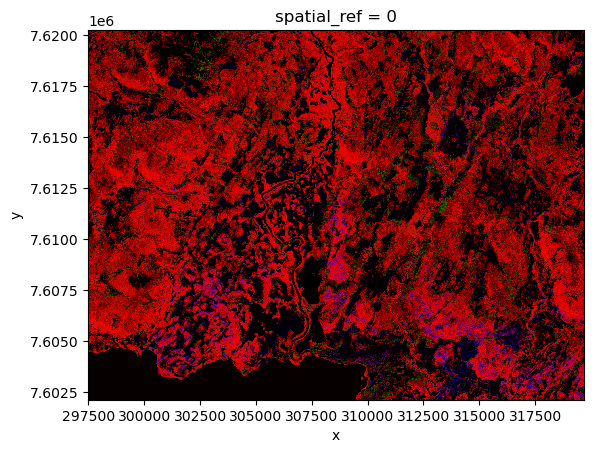

In [8]:
Rx.plot.imshow()